# Initial Analysis

## Medical Data Understanding

### Skin Lesions Types

Skin lesions can be classified as benign (non-cancerous) and malignant (cancerous). Within each of those two categories, there are subcategories on the type of skin lesion, being commonly for malignant lesions to be classified as melanoma and non-melanoma, due to the mortality rate of melanoma skin cancer when compared to other skin cancers. <br>
The ISIC 2018 dataset includes 7 types of skin lesion:
- <b>Melanoma (MEL):</b> malignant
- <b>Melanocytic nevus (NV):</b> benign growth on the skin that is caused by melanocytes, the cells that produce pigment (melanin).
- <b>Basal cell carcinoma (BCC):</b> malignant growth most commonly caused by ultraviolet (UV) light exposure.
- <b>Actinic keratosis / Bowen’s disease (intraepithelial carcinoma) (AKIEC):</b>
- <b>Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis) (BKL):</b> benign skin growths that can appear as raised, wart-like patches, or scaly, rough areas on the skin.
- <b>Dermatofibroma (DF):</b>
- <b>Vascular lesion (VASC):</b>

### Diagnosis Process

### Current Challenges

## Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.image as mpimg
import squarify
import PIL
from PIL import Image
import cv2
from glob import glob

## Data Import

### Tabular Data

In [2]:
dfGroundTruth = pd.read_csv('ISIC2018_Task3_Training_GroundTruth.csv')
dfLesionGroupings = pd.read_csv('ISIC2018_Task3_Training_LesionGroupings.csv')

In [3]:
dfGroundTruth.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dfLesionGroupings.head()

,image,lesion_id,diagnosis_confirm_type
0,ISIC_0024306,HAM_0000550,serial imaging showing no change
1,ISIC_0024307,HAM_0003577,serial imaging showing no change
2,ISIC_0024308,HAM_0001477,serial imaging showing no change
3,ISIC_0024309,HAM_0000484,serial imaging showing no change
4,ISIC_0024310,HAM_0003350,histopathology


### Image Data

In [14]:
# Save as list all images of the dataset
lesionImages = glob('ISIC2018_Task3_Training_Input/*.jpg')

In [15]:
len(lesionImages)

10015

## Dataset Analysis

### Ground Truth Data

In [5]:
dfGroundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   10015 non-null  object 
 1   MEL     10015 non-null  float64
 2   NV      10015 non-null  float64
 3   BCC     10015 non-null  float64
 4   AKIEC   10015 non-null  float64
 5   BKL     10015 non-null  float64
 6   DF      10015 non-null  float64
 7   VASC    10015 non-null  float64
dtypes: float64(7), object(1)
memory usage: 626.1+ KB


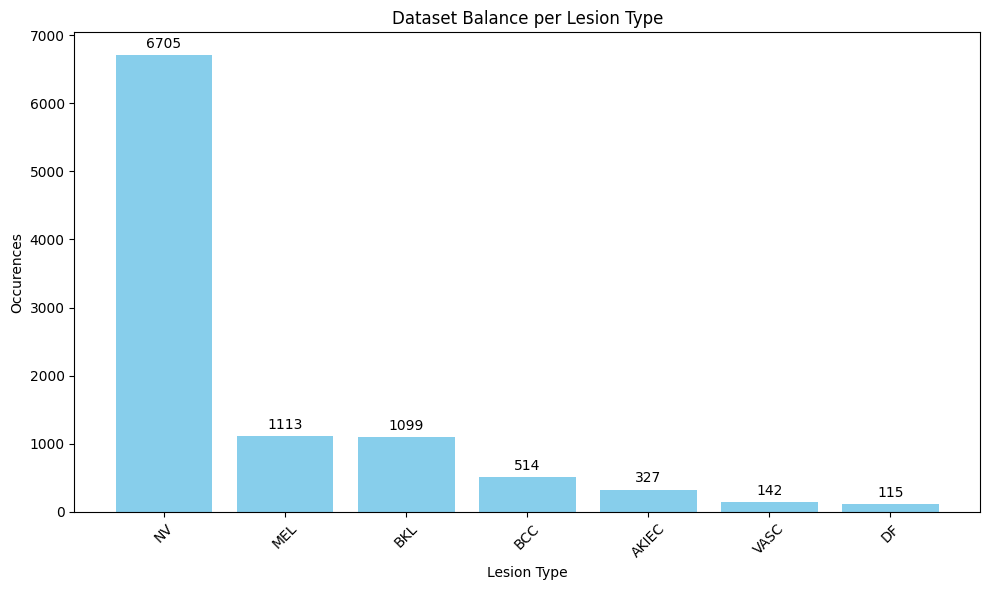

In [6]:
# Definition of cancer type features and values
lesionTypes = ["MEL","NV","BCC","AKIEC","BKL","DF","VASC"]
lesionTypeOccurences = dfGroundTruth[lesionTypes].sum().sort_values(ascending=False)

# Creation of bar plot with data labels and titles
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(lesionTypeOccurences.index, lesionTypeOccurences.values, color='skyblue')
ax.bar_label(bars, padding=3)
ax.set_title('Dataset Balance per Lesion Type')
ax.set_xlabel('Lesion Type')
ax.set_ylabel('Occurences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lesion Groupings Data

In [7]:
dfLesionGroupings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   image                   10015 non-null  object
 1   lesion_id               10015 non-null  object
 2   diagnosis_confirm_type  10015 non-null  object
dtypes: object(3)
memory usage: 234.9+ KB


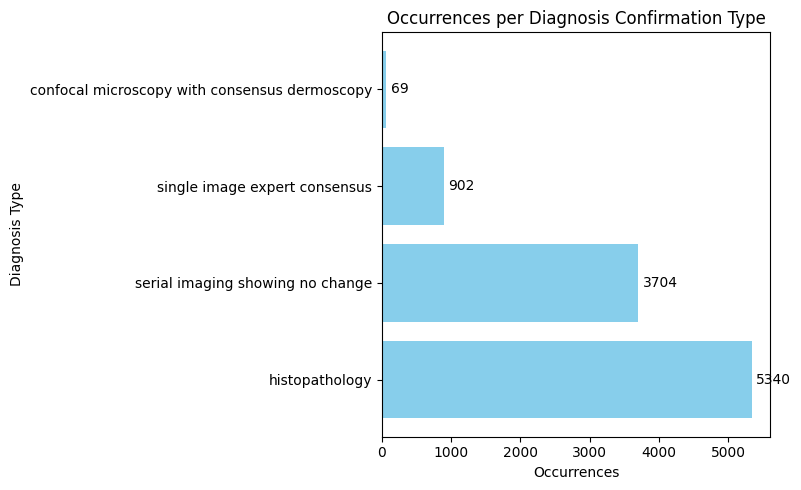

In [8]:
# Definition of diagnosis confirmation type and values
diagnosisTypeCount = dfLesionGroupings['diagnosis_confirm_type'].value_counts()

# Creation of horizontal plot with data values
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(diagnosisTypeCount.index, diagnosisTypeCount.values, color='skyblue')
ax.bar_label(bars, padding=3)
ax.set_ylabel('Diagnosis Type')
ax.set_xlabel('Occurrences')
ax.set_title('Occurrences per Diagnosis Confirmation Type')
plt.tight_layout()
plt.show()

### Combined Ground Truth and Lesion Groupings

In [9]:
# Merging of both datasets to allow combined analysis
dfCombined = pd.merge(dfGroundTruth, dfLesionGroupings, on='image')

In [10]:
dfCombined.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,lesion_id,diagnosis_confirm_type
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HAM_0000550,serial imaging showing no change
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HAM_0003577,serial imaging showing no change
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HAM_0001477,serial imaging showing no change
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HAM_0000484,serial imaging showing no change
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,HAM_0003350,histopathology


In [11]:
# Reverse one-hot encoding from cancer types features, creating a single cancer_type column
dfCombined['lesion_type'] = dfCombined[lesionTypes].idxmax(axis=1)
dfCombined = dfCombined.drop(columns=lesionTypes)

In [12]:
dfCombined.head()

,image,lesion_id,diagnosis_confirm_type,lesion_type
0,ISIC_0024306,HAM_0000550,serial imaging showing no change,NV
1,ISIC_0024307,HAM_0003577,serial imaging showing no change,NV
2,ISIC_0024308,HAM_0001477,serial imaging showing no change,NV
3,ISIC_0024309,HAM_0000484,serial imaging showing no change,NV
4,ISIC_0024310,HAM_0003350,histopathology,MEL


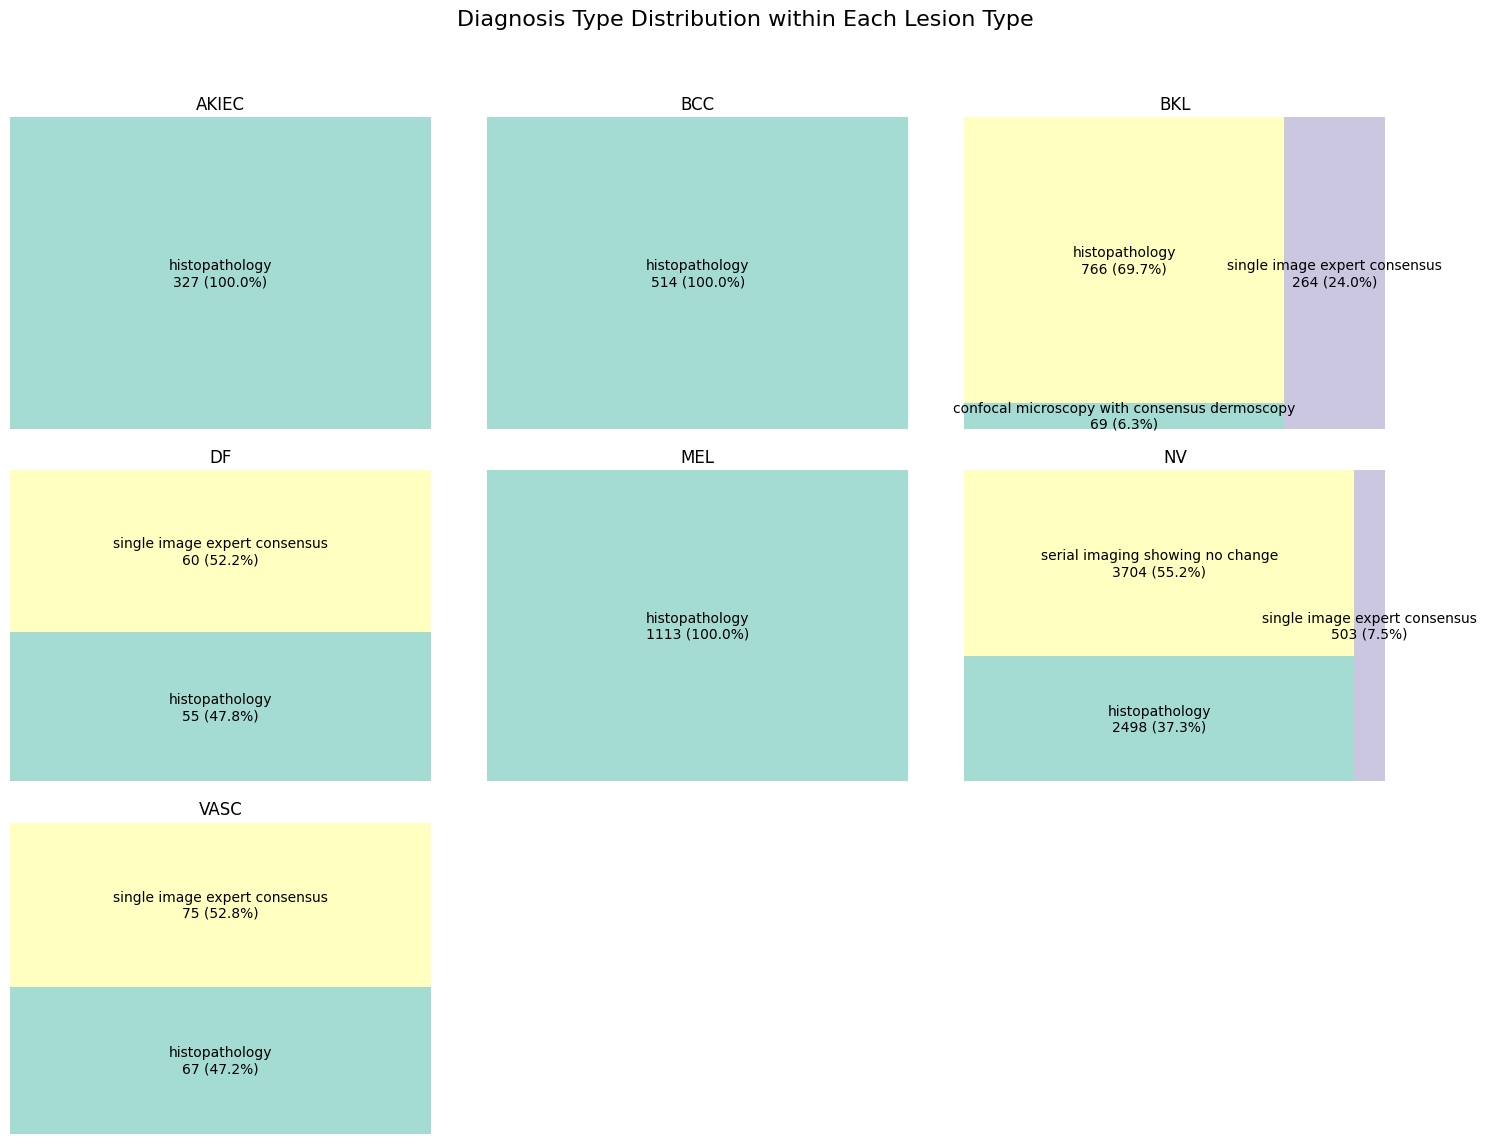

In [13]:
# Group data and extract unique cancer types
dfGrouped = dfCombined.groupby(['lesion_type', 'diagnosis_confirm_type']).size().reset_index(name='count')
lesionTypes = dfGrouped['lesion_type'].unique()

cols = 3
rows = 3
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

# Flatten axes for 1D list and iterate through the cancer types
# Definition of labels to show diagnosis types and size it based on sample size
# Colour pattern and labels definition
axes = axes.flatten()
for i, category in enumerate(lesionTypes):
    ax = axes[i]
    sub_df = dfGrouped[dfGrouped['lesion_type'] == category]
    total = sub_df['count'].sum()
    labels = sub_df.apply(lambda x: f"{x['diagnosis_confirm_type']}\n{x['count']} ({x['count'] / total:.1%})", axis=1)
    sizes = sub_df['count'].values
    colors = plt.cm.Set3(range(len(sizes)))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, ax=ax)
    ax.set_title(f"{category}", fontsize=12)
    ax.axis('off') # removed axis grid

for j in range(i + 1, len(axes)):
       axes[j].axis('off') # removed unused subplots

plt.suptitle("Diagnosis Type Distribution within Each Lesion Type", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Skin Lesion Images Data

In [33]:
plb.imread(lesionImages[0]).shape # (height, width, channel (RGB))

(450, 600, 3)

In [34]:
# Check if all images have same size
diffSizedImg=[]
for imgPath in lesionImages:
    if plb.imread(imgPath).shape!=(450,600,3):
        diffSizedImg.add(imgPath)
        
if not diffSizedImg:
    print("All images present same sizing")
else:
    print(f'{len(diffSizedImg)} images present different sizing')

All images present same sizing


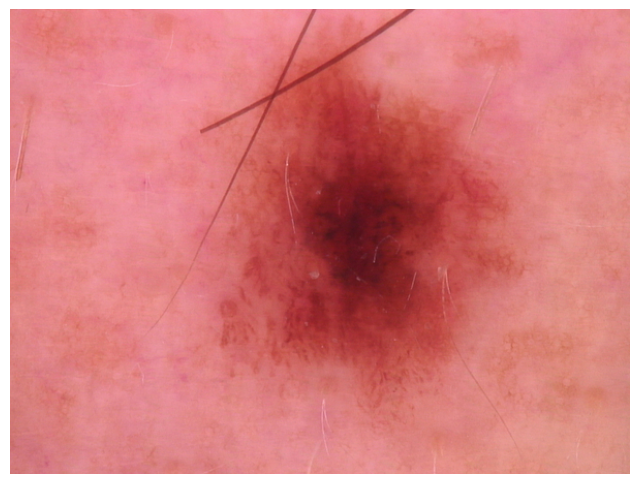

In [60]:
# Checking one of the images (as example)
exampleImg = plb.imread(lesionImages[0])
fig, ax = plb.subplots(figsize=(8,8))
ax.imshow(exampleImg)
ax.axis('off')
plb.show()

<b>Note to self:</b> When applying the model for classification of images, it would be interesting to understand the impact to model performance when providing full coloured image vs image filtered to a single RGB channel vs black and white image

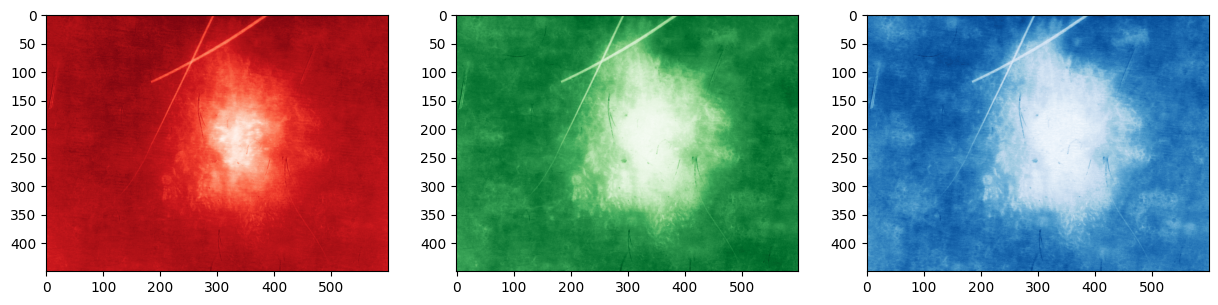

In [58]:
# Breaking down the image by RGB channel
fig, axs = plb.subplots(1,3,figsize=(15,5))
axs[0].imshow(exampleImg[:,:,0], cmap="Reds")
axs[1].imshow(exampleImg[:,:,1], cmap="Greens")
axs[2].imshow(exampleImg[:,:,2], cmap="Blues")
plb.show()

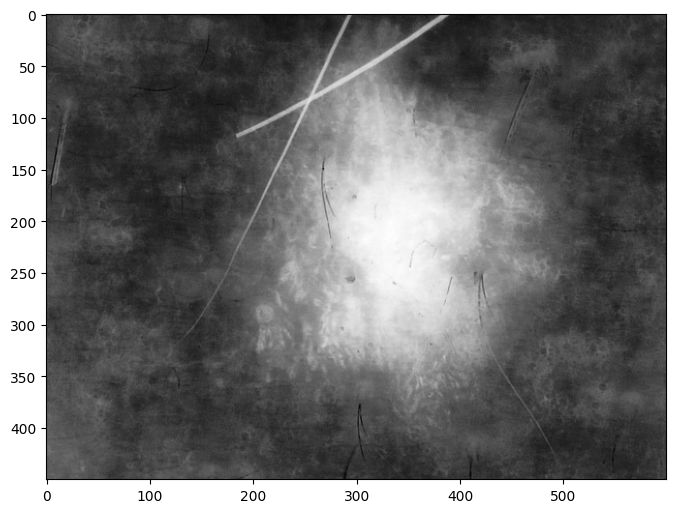

In [59]:
# Transforming image into black and white
exampleImgGrey = cv2.cvtColor(exampleImg, cv2.COLOR_RGB2GRAY)
fig, ax = plb.subplots(figsize=(8,8))
ax.imshow(exampleImgGrey, cmap="Greys")
plb.show()

In [47]:
# Capture image path and id into dataframe
# This will alow joining with other datasets for easier identification and analysis
dfLesionImgs = pd.DataFrame({'imgPath':lesionImages})
dfLesionImgs['image']=dfLesionImgs['imgPath'].str[-16:-4]

In [25]:
# Gathering of 5 randomly chosen examples of each category

sampleMEL = dfCombined[dfCombined['lesion_type']=="MEL"].sample(n=5)
sampleNV = dfCombined[dfCombined['lesion_type']=="NV"].sample(n=5)
sampleBCC = dfCombined[dfCombined['lesion_type']=="BCC"].sample(n=5)
sampleAKIEC = dfCombined[dfCombined['lesion_type']=="AKIEC"].sample(n=5)
sampleBKL = dfCombined[dfCombined['lesion_type']=="BKL"].sample(n=5)
sampleDF = dfCombined[dfCombined['lesion_type']=="DF"].sample(n=5)
sampleVASC = dfCombined[dfCombined['lesion_type']=="VASC"].sample(n=5)

sampleByLesion = pd.concat([sampleMEL,sampleNV,sampleBCC,sampleAKIEC,sampleBKL,sampleDF,sampleVASC],ignore_index=True)

In [48]:
# Join the samples dataset with the image paths one
sampleByLesion = pd.merge(sampleByLesion, dfLesionImgs, on='image')

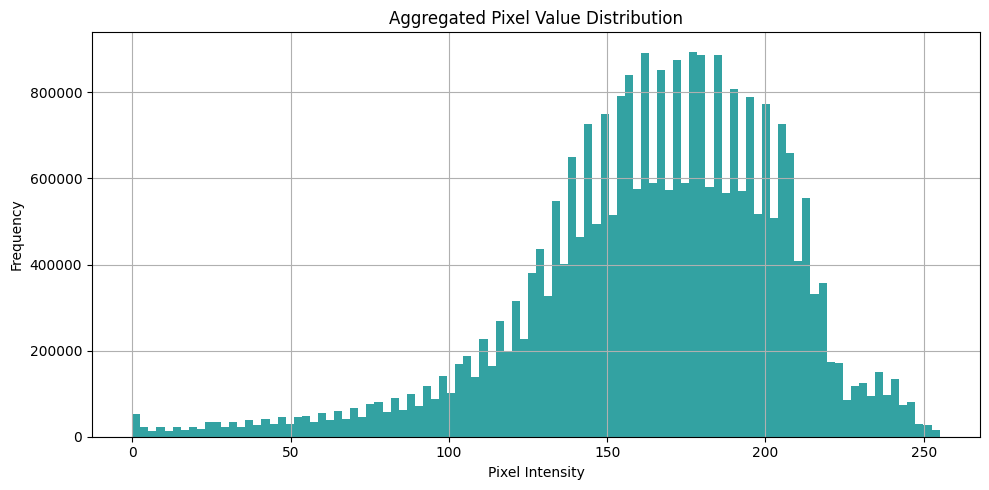

In [51]:
# Checking overall pixel distribution across all samples collected (5 from each lesion type category)
allPixels = [] 
for imgPath in sampleByLesion['imgPath']: 
    flatImg = mpimg.imread(imgPath).flatten() 
    allPixels.extend(flatImg) 
allPixels = np.array(allPixels)

plt.figure(figsize=(10, 5)) 
plt.hist(allPixels, bins=100, color='darkcyan', alpha=0.8) 
plt.title('Aggregated Pixel Value Distribution') 
plt.xlabel('Pixel Intensity') 
plt.ylabel('Frequency') 
plt.grid(True) 
plt.tight_layout() 
plt.show()

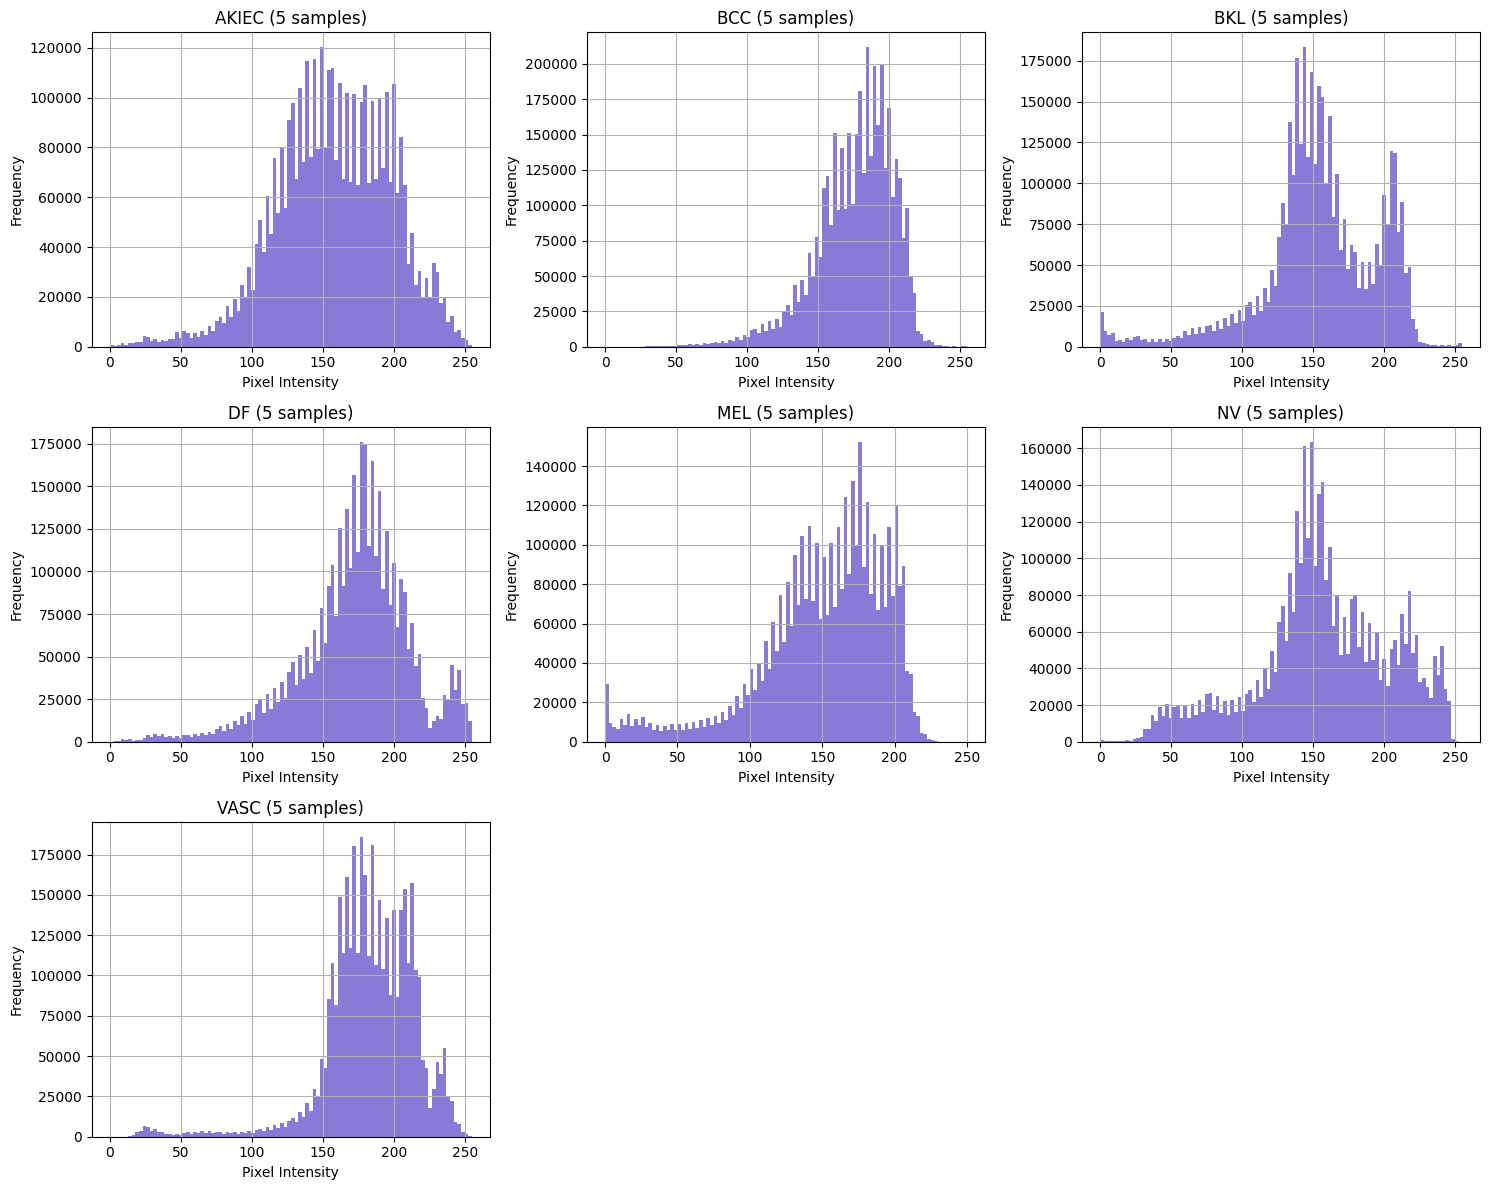

In [54]:
# Broken down the pixel intensity distribution by each lesion type (based on 5 randomly chosen examples per lesion type)

groupedSamples = sampleByLesion.groupby('lesion_type')
groupTypes = len(groupedSamples)
cols = 3
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for ax, (lesionType, group) in zip(axes, groupedSamples):
    pixels = []
    for path in group['imgPath']:
        img = mpimg.imread(path).flatten()
        pixels.extend(img)
    ax.hist(pixels, bins=100, color='slateblue', alpha=0.8)
    ax.set_title(f'{lesionType} ({len(group)} samples)')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.grid(True)

for ax in axes[groupTypes:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()